In [84]:
from functools import partial, reduce
from itertools import *
import operator

from datascience import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')

pd.set_option("display.max_rows", 20)

In [17]:
# stolen from https://github.com/data-8/datascience/blob/master/datascience/formats.py


def format_number(value, decimals=2, separator=','):
    if isinstance(value, (int, np.integer)):
        return ('{:' + separator + 'd}').format(value)
    else:
        return ('{:' + separator + '.' + str(decimals) + 'f}').format(value)

In [22]:
# ds # top = Table.read_table('top_movies_2017.csv')
top = pd.read_csv('top_movies_2017.csv')

# ds # top = top.with_column('Row Index', np.arange(top.num_rows)).move_to_start('Row Index')
# we already have an index in the data frame

# ds # top.set_format(['Gross', 'Gross (Adjusted)'], NumberFormatter)
#top.style.applymap(format_number, subset=['Gross', 'Gross (Adjusted)'])
top_style = top.style.format({'Gross': format_number, 'Gross (Adjusted)': format_number})
top_style

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [23]:
# ds # top.take([3, 5, 7])
top.take([3, 5, 7])

,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
5,The Ten Commandments,Paramount,65500000,1164590000,1956
7,Doctor Zhivago,MGM,111721910,1103564200,1965


In [26]:
# ds # top.where('Title', are.containing('and the'))
top["Title"].where(['and the' in elem for elem in top["Title"]]).dropna()

9                       Snow White and the Seven Dwarves
35                    Butch Cassidy and the Sundance Kid
70                                 Smokey and the Bandit
71                           Beauty and the Beast (2017)
74                 Harry Potter and the Sorcerer's Stone
75                                    Lady and the Tramp
91                  Indiana Jones and the Temple of Doom
105                   Indiana Jones and the Last Crusade
114          Harry Potter and the Deathly Hallows Part 2
129                                 Beauty and the Beast
130    The Chronicles of Narnia: The Lion, the Witch ...
131                  Harry Potter and the Goblet of Fire
133              Harry Potter and the Chamber of Secrets
139    Indiana Jones and the Kingdom of the Crystal S...
154            Harry Potter and the Order of the Phoenix
175               Harry Potter and the Half-Blood Prince
177             Harry Potter and the Prisoner of Azkaban
Name: Title, dtype: object

In [27]:
start = np.random.choice(np.arange(10))
top.take(np.arange(start, start + 5))

,Title,Studio,Gross,Gross (Adjusted),Year
4,Titanic,Paramount,658672302,1204368000,1997
5,The Ten Commandments,Paramount,65500000,1164590000,1956
6,Jaws,Universal,260000000,1138620700,1975
7,Doctor Zhivago,MGM,111721910,1103564200,1965
8,The Exorcist,Warner Brothers,232906145,983226600,1973


In [40]:
top.sample(50).sort_index()

,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,198676459,1796176700,1939
3,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
13,Ben-Hur,MGM,74000000,871220000,1959
17,Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1999
18,The Lion King,Buena Vista,422783777,792511700,1994
30,The Dark Knight,Warner Brothers,534858444,661980500,2008
36,Love Story,Paramount,106397186,622283500,1970
37,Spider-Man,Sony,403706375,617719400,2002
41,Cleopatra (1963),Fox,57777778,597261000,1963
42,Beverly Hills Cop,Paramount,234760478,596963700,1984


In [39]:
top.sample(50, replace=True).groupby("Title")["Title"].count()

Title
Airport                                                   1
American Graffiti                                         1
Apollo 13                                                 2
Avatar                                                    1
Beauty and the Beast                                      1
Beauty and the Beast (2017)                               1
Cleopatra (1963)                                          1
Crocodile Dundee                                          1
Dances with Wolves                                        1
Deadpool                                                  1
Finding Nemo                                              2
Harry Potter and the Chamber of Secrets                   1
Independence Day                                          1
Inside Out                                                1
Jurassic World                                            1
Kramer Vs. Kramer                                         1
Liar Liar                         

In [62]:
def face_hist(df):
    df.hist('face', bins=np.arange(0.5, 7, 1), density=True)
    plt.xlabel('Face')
    plt.ylabel('Percent per {}'.format("face"))

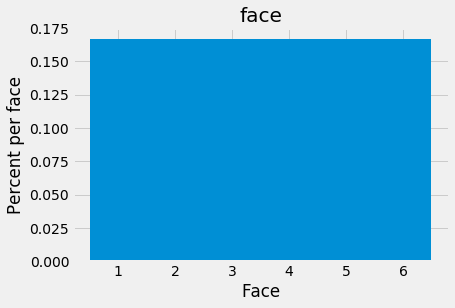

In [63]:
die = pd.DataFrame({'face': np.arange(6)+1})
face_hist(die)

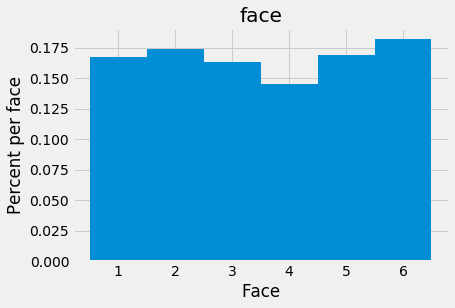

In [65]:
face_hist(die.sample(1000, replace=True))

In [78]:
def delay_hist(t):
    t.hist('Delay', bins=np.arange(-30, 301, 10), density=True, )
    plt.xlabel("minutes")
    plt.ylabel("minutes probability")

In [85]:
united = pd.read_csv('united.csv')
united

,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


In [87]:
united["Delay"].min()

-10

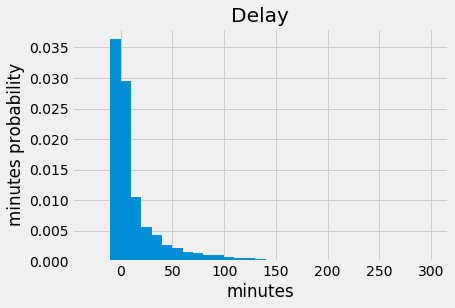

In [79]:
delay_hist(united)

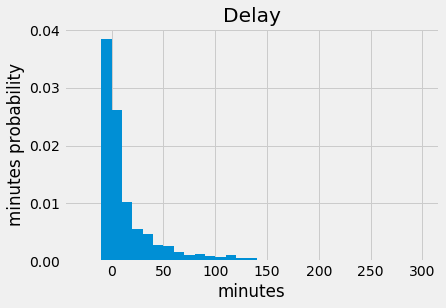

In [92]:
delay_hist(united.sample(1000))

In [93]:
1-(5/6)**4

0.5177469135802468

In [94]:
p1=1/6 + 1/6 - (1/6)**2
p2=1/6+p1-(1/6)*p1
p3=1/6+p2-(1/6)*p2
p3

0.5177469135802468

In [95]:
(1/6)**4

0.0007716049382716048

# definitions

term |  definition
:--- | :---------
experiment | a situation involving chance
trial | ??
outcome | a result of a single trial
outcomes | all the possible results of the experiment
event | one (or more?) outcomes actually occurring
compound event | an event consisting on two or more events (multiple trials?)
probability (of an event) | likelihood of an event occurring
sample space | set of all possible outcomes of that experiment
mutually exclusive events | they cannot occur at the same time (no outcomes in common)
independent events | A and B are independent of occurance of A does not influence probability of B occuring
conditional probability | the probability that event B occurs given that event A has already occurred: $$p(B|A)$$

$$(1) P(A) = \frac {\text{number of ways event A can occur}}{\text{total number of possible outcomes}}$$

$$(2) \sum_{A \in S} P(A) = 1, \quad \text{S is the sample space}$$

$$(3) P(\bar{A}) = 1 - P(A)$$

$$(4) P(A \lor B) = P(A) + P(B), \quad A \cap B = \emptyset \quad \text{(exclusive events)}$$

$$(5) P(A \lor B) = P(A) + P(B) - P(A \land B), \quad A \cap B \neq \emptyset  \quad \text{(non-exclusive events)}$$

$$(6) P(A \land B) = P(A) * P(B), \quad P(B|A) = P(B|{\bar A}) \quad \text{(independent events)}$$

$$(7) P(A \land B) = P(A) * P(B|A), \quad P(B|A) \neq P(B|{\bar A}) \quad \text{(dependent events)}$$

$$(8) P(B|A) = \frac{P(A \land B)}{P(A)}$$

$$A \not \Rightarrow B$$